# Module 5. Data Loading, Storage and File Formats

<sub><sup>The notebook is prepared based on the sixth chapter of McKinney, M. (2017). Python for Data Analysis, O'Reilly. ISBN 9781491957660.</sup></sub>

Accessing data is first step to any data analysis step.

Input and Output fall in a few main categories: reading tabular data or other on-disk formats, loading data from databases, and interacting with network sources like web APIs.

# 1. Reading and Writing Data in Text Format

`pandas` has number of functions for reading tabular data as `DataFrame` object. '`read_csv`' and '`read_table`' are most likely to be used. These functions in general convert text data into a DataFrame. 

Also, many `pandas` functions are capable of inferring the data type of columns based on the data they hold. So, you  don't have to specify which columns are numeric, text, etc.

To import a comma-delimited file, you can just use `read_csv`.

In [ ]:
import pandas as pd

df = pd.read_csv('examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Another option to read a csv file is to use `read_table` and specify the delimiter:

In [ ]:
pd.read_table('examples/ex1.csv',sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


A file will not always have a header row. Consider this file (**ex2.csv**):

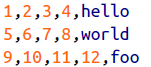

For this we can either allow pandas to assign default names or specify the names ourselves.

In [ ]:
pd.read_csv('examples/ex2.csv', header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
pd.read_csv('examples/ex2.csv', names=['a','b','c','d','message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Suppose you wanted the `message` column to be the index of the returned `DataFrame`.
You can either indicate you want the column at index `4` or named '`message`' using the **`index_col`** argument:

In [ ]:
names = ['a','b','c','d','message']
pd.read_csv('examples/ex2.csv', names=names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


To form hierarchical index from multiple columns, pass a list of column numbers or names in that order.

In [ ]:
parsed = pd.read_csv('examples/csv_mindex.csv', index_col=['key1', 'key2'])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

`read_csv` comes with many arguments. For example, you can use `skiprows` to not include specific rows when the file is being imported.

In the following code, we will skip the first, third, and fourth rows of a file with `skiprows`:

In [ ]:
pd.read_csv('examples/ex4.csv', skiprows=[0,2,3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Handling missing values is an important and frequently nuanced part of the file parsing process. 

Missing data is usually either not present (empty string) or marked by
some sentinel value. 

By default, pandas uses a set of commonly occurring sentinels,
such as `NA` and `NULL`:

In [ ]:
result = pd.read_csv('examples/ex5.csv')
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [ ]:
pd.isnull(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


The `na_values` option can take either a list or set of strings to consider missing values:

In [ ]:
result = pd.read_csv('examples/ex5.csv', na_values=['NULL'])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


## 1.1. Reading Text Files in Pieces
When processing very large files or figuring out the right set of arguments to correctly process a large file, 
you may only want to read in a small piece of a file or iterate
through smaller chunks of the file.

Before we look at a large file, we make the `pandas` display settings more compact:

In [ ]:
pd.options.display.max_rows = 12

Now we have:

In [ ]:
result = pd.read_csv('examples/ex6.csv')
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
...,...,...,...,...,...
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G
9999,-0.096376,-1.012999,-0.657431,-0.573315,0


Sometimes the data can be extremely big and if you just want to explore it quickly, loading the whole data might be costly in terms of memory and speed. 

In such cases, you can only read a small number of rows (avoiding reading the entire file) by using the `nrows` argument:

In [ ]:
pd.read_csv('examples/ex6.csv', nrows=4)

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R


## 1.2 Writing Data to Text Format
Data can also be exported to a delimited format. Let’s consider one of the CSV files
read before:

In [ ]:
data = pd.read_csv('examples/ex5.csv')
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


Using DataFrame’s `to_csv` method, we can write the data out to a comma-separated
file:

In [ ]:
data.to_csv('examples/out.csv')

Other delimiters can be used, of course (writing to` sys.stdout` so it prints the text result to the console):

In [ ]:
import sys

data.to_csv(sys.stdout, sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


Missing values appear as empty strings in the output. You might want to denote them
by some other sentinel value:

In [ ]:
data.to_csv(sys.stdout, na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


Normally, when writing your data to a file, both the row and column labels are included. Both of
these can be disabled:

In [ ]:
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


You can also write only a subset of the columns, and in an order of your choosing:

In [ ]:
data.to_csv(sys.stdout, index=False, columns=['a', 'b', 'c'])

a,b,c
1,2,3.0
5,6,
9,10,11.0


## 1.3. JSON Data
JSON (JavaScript Object Notation) has become one of the standard formats for sending data via HTTP between browsers and applications.
It is a much more free-form data format than CSV.

The basic types in JSON are:
1. Objects (dicts)
2. Arrays (lists)
3. Strings
4. Numbers
5. Booleans
6. Nulls

All the keys in the object must be strings.

In [ ]:
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

There are several libraries for working with JSON files. One of them is `json`, which is built into standard library.

We can use `json.loads` to convert JSON string to Python dictionary form.

In [ ]:
import json

result = json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

`json.dumps` converts Python object back to JSON, which is a string that has the content of the JSON.


In [ ]:
asjson = json.dumps(result)
asjson

'{"name": "Wes", "places_lived": ["United States", "Spain", "Germany"], "pet": null, "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]}, {"name": "Katie", "age": 38, "pets": ["Sixes", "Stache", "Cisco"]}]}'

a `JSON` object or list of objects can be transformed into a `DataFrame`  by passing the list to DataFrame constructor and select subset of data fields.

In [ ]:
siblings = pd.DataFrame(result['siblings'], columns=['name','age'])
siblings

,name,age
0,Scott,30
1,Katie,38


`pandas.read_json` can automatically convert JSON datasets into Series or DataFrame.

The default options for this assume that each object in the JSON array is a row in the table.


In [ ]:
data = pd.read_json('examples/example.json')
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9



To export data from pandas to JSON, we can use `to_json` method on a Series or DataFrame.

In [ ]:
print(data.to_json())

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}


In [ ]:
print(data.to_json(orient='records'))

[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


## 1.4 Reading Microsoft Excel Files
`pandas` also supports reading files in Excel 2003 and higher using the`pandas.read_excel` function.

Below is an example use of `pandas.read_excel` to import `ex1.xlsx`. You can specify which sheet you want to import.

In [ ]:
frame = pd.read_excel('examples/ex1.xlsx', 'Sheet1')
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


To write your dataframe into an Excel file, then you can use the `to_excel` function:

In [ ]:
frame.to_excel('examples/ex2.xlsx')

# 2. Importing Html Tables
`pandas` has a built-in function, `read_html`, which uses libraries like `lxml` and `BeautifulSoup` to automatically parse tables out of HTML files as DataFrame objects. 

To show how this works, we have an example HTML file
from the United States FDIC government agency showing bank failures.

The `pandas.read_html` function has a number of options, but by default it searches
for and attempts to parse all tabular data contained within `<table>` tags. The result is a list of DataFrame objects:

In [ ]:
tables = pd.read_html('examples/fdic_failed_bank_list.html')
len(tables)

1

In [ ]:
failures = tables[0]
failures.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


# 3. Interacting with Web APIs
Many websites have public APIs that provide data feeds via JSON or some other format.

There are a number of ways to get their data, one of which is the `requests` package.

In this example, we will find last 30 Github issues for pandas. We will use `GET HTTP` request using requests library.

In [ ]:
import requests

url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
resp

<Response [200]>

The response object's JSON will provide a dictionary having JSON parsed into native Python objects.

In [ ]:
data = resp.json()
data[0]

{'url': 'https://api.github.com/repos/pandas-dev/pandas/issues/46745',
 'repository_url': 'https://api.github.com/repos/pandas-dev/pandas',
 'labels_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/46745/labels{/name}',
 'comments_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/46745/comments',
 'events_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/46745/events',
 'html_url': 'https://github.com/pandas-dev/pandas/pull/46745',
 'id': 1200633761,
 'node_id': 'PR_kwDOAA0YD842CSaw',
 'number': 46745,
 'title': 'PERF: avoid casting in groupby.min/max',
 'user': {'login': 'jbrockmendel',
  'id': 8078968,
  'node_id': 'MDQ6VXNlcjgwNzg5Njg=',
  'avatar_url': 'https://avatars.githubusercontent.com/u/8078968?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/jbrockmendel',
  'html_url': 'https://github.com/jbrockmendel',
  'followers_url': 'https://api.github.com/users/jbrockmendel/followers',
  'following_url': 'https://api.github.com/users

Each element in `data` is a `dict` containing all of the data found in the Github Issue page (except for comments).

From this we can pass data directly to a DataFrame and select the fields of interest.

In [ ]:
issues = pd.DataFrame(data, columns=['number', 'title', 'labels', 'state'])
issues.head()

,number,title,labels,state
0,46745,PERF: avoid casting in groupby.min/max,"[{'id': 233160, 'node_id': 'MDU6TGFiZWwyMzMxNj...",open
1,46744,ENH: Support using repr() instead of str() to ...,"[{'id': 76812, 'node_id': 'MDU6TGFiZWw3NjgxMg=...",open
2,46743,BUG: `json_normalize` adding unexpected nesting,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
3,46742,REF: stronger typing in libconversion,"[{'id': 127681, 'node_id': 'MDU6TGFiZWwxMjc2OD...",open
4,46740,ENH: add validate as a param to join (#46622),"[{'id': 76812, 'node_id': 'MDU6TGFiZWw3NjgxMg=...",open


With some more work, we can create our own high-level interfaces to common web APIs that return DataFrame objects for easy analysis.

# 4. In-class Exercise: Reading Inflation Data from Wikipedia

In this exercise, we will import two tables from a Wikipedia page: 

*   the table that lists the current inflation rates
*   the table that lists the countries' inflation rates for the last 5 years.

Sample rows from these tables and the source URL are shown below.

**The table that lists the current inflation rates**

<sub>Retrieved from https://tradingeconomics.com/country-list/inflation-rate-</sub>
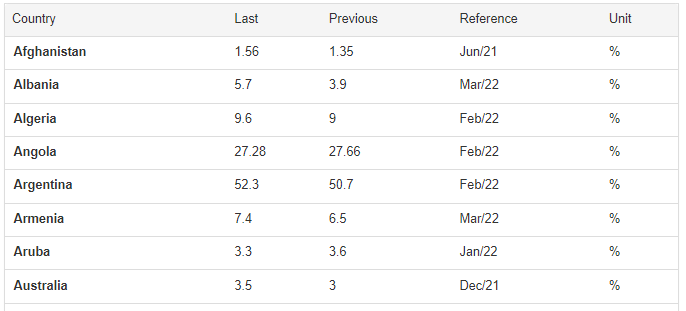

**The table that lists the inflation rates for the last 5 years**

<sub>Retrieved from https://en.wikipedia.org/wiki/List_of_countries_by_inflation_rate</sub>
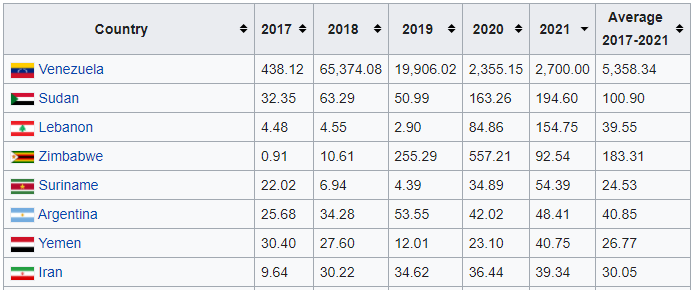

## 4.1. First Table (The Current Inflation Rate)

Let's first import the tables from the indicated url using the `read_html` function. Url is: https://tradingeconomics.com/country-list/inflation-rate-



In [ ]:
tables = pd.read_html('https://tradingeconomics.com/country-list/inflation-rate-')
len(tables)

1

The table of showing the latest inflation rates should be at index 0 since there is only one table found in the page.

In [ ]:
df_currInf = tables[0]
df_currInf.head()

,Country,Last,Previous,Reference,Unit
0,Afghanistan,1.56,1.35,Jun/21,%
1,Albania,5.70,3.90,Mar/22,%
2,Algeria,9.60,9.00,Feb/22,%
3,Angola,27.28,27.66,Feb/22,%
4,Argentina,52.30,50.70,Feb/22,%


As you might notice, for some countries the inflation rate is from 2021 and for some others it is from 2022. 

Let's only keep the 2022 data since it is the most recent one. To do that we can apply `str.contains` method and retain these that contain '22' in the Reference column.

In [ ]:
filter22 = df_currInf['Reference'].str.contains('22')
df_currInf = df_currInf[filter22]
df_currInf.head()

,Country,Last,Previous,Reference,Unit
1,Albania,5.70,3.90,Mar/22,%
2,Algeria,9.60,9.00,Feb/22,%
3,Angola,27.28,27.66,Feb/22,%
4,Argentina,52.30,50.70,Feb/22,%
5,Armenia,7.40,6.50,Mar/22,%


Next, let's sort the data by `Last` column using the `sort_values` function in a descending order (which can be indicated with `ascending=False` argument).

In [ ]:
df_currInf = df_currInf.sort_values('Last', ascending = False)
df_currInf.head(10)

,Country,Last,Previous,Reference,Unit
181,Venezuela,284.00,340.00,Mar/22,%
158,Sudan,260.00,318.00,Jan/22,%
95,Lebanon,215.00,240.00,Mar/22,%
184,Zimbabwe,72.70,66.10,Mar/22,%
159,Suriname,61.50,60.65,Jan/22,%
171,Turkey,61.14,54.44,Mar/22,%
4,Argentina,52.30,50.70,Feb/22,%
79,Iran,34.70,35.40,Mar/22,%
55,Ethiopia,33.60,34.50,Feb/22,%
3,Angola,27.28,27.66,Feb/22,%


Next, insted of the column name `Last` we want to indicate the year itself. That is, we want to update the column name (you can use the `rename` function).

In [ ]:
df_currInf = df_currInf.rename(columns={'Last':'2022'})
df_currInf.columns

Index(['Country', '2022', 'Previous', 'Reference', 'Unit'], dtype='object')

Now, let's find the countries with current inflation rate greater than 50:

In [ ]:
mask = df_currInf['2022'] > 50
df_currInf = df_currInf[mask]
df_currInf.head(10)

,Country,2022,Previous,Reference,Unit
181,Venezuela,284.00,340.00,Mar/22,%
158,Sudan,260.00,318.00,Jan/22,%
95,Lebanon,215.00,240.00,Mar/22,%
184,Zimbabwe,72.70,66.10,Mar/22,%
159,Suriname,61.50,60.65,Jan/22,%
171,Turkey,61.14,54.44,Mar/22,%
4,Argentina,52.30,50.70,Feb/22,%


## 4.2. The Second Table (The Last 5 years' inflation rate)

Now, let's import the tables from the other url using the `read_html` function. The Url is: https://en.wikipedia.org/wiki/List_of_countries_by_inflation_rate

In [ ]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_inflation_rate')
len(tables)

4

In total, four tables are returned from the given url. After several trials, we know that the table we are looking for is at index 2:

In [ ]:
df_4years = tables[2]
df_4years.head()

,Country,2017,2018,2019,2020,2021,Average2017-2021
0,Samoa,1.30,3.67,2.19,1.49,-3.00,1.13
1,Comoros,0.09,1.70,3.70,0.80,-1.05,1.05
2,St. Kitts and Nevis,0.70,-1.04,-0.33,-0.59,-0.97,-0.45
3,Macau,1.23,3.00,2.75,0.81,-0.25,1.51
4,Japan,0.49,0.99,0.47,-0.03,-0.17,0.35


Let's drop the last column named `Average2017-2021`. We do not need it.

In [ ]:
del df_4years['Average2017-2021']
df_4years.columns

Index(['Country', '2017', '2018', '2019', '2020', '2021'], dtype='object')

Now, our goal is to filter this dataframe based on the countries obtained in the previous dataframe (`df_currInf`). 

In other words, we want to keep the countries for which we have their inflation rate for the year of 2022.

In [ ]:
filterByCountry = df_4years['Country'].isin(df_currInf['Country'])
df_4years = df_4years[filterByCountry]
df_4years

,Country,2017,2018,2019,2020,2021
179,Turkey,11.14,16.33,15.18,12.28,16.98
187,Argentina,25.68,34.28,53.55,42.02,48.41
188,Suriname,22.02,6.94,4.39,34.89,54.39
189,Zimbabwe,0.91,10.61,255.29,557.21,92.54
190,Lebanon,4.48,4.55,2.90,84.86,154.75
191,Sudan,32.35,63.29,50.99,163.26,194.60
192,Venezuela,438.12,65374.08,19906.02,2355.15,2700.00


Next, we want to see the changes in terms of percentages across years per each conuntry. For example how much it increased/descreased for Turkey from 2020 to 2021?

In [ ]:
df_4years.index = df_4years.Country
df_currInf.index = df_currInf.Country
df_4years['2022'] = df_currInf['2022']
df_4years

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,2017,2018,2019,2020,2021,2022
Country,,,,,,,
Turkey,Turkey,11.14,16.33,15.18,12.28,16.98,61.14
Argentina,Argentina,25.68,34.28,53.55,42.02,48.41,52.30
Suriname,Suriname,22.02,6.94,4.39,34.89,54.39,61.50
Zimbabwe,Zimbabwe,0.91,10.61,255.29,557.21,92.54,72.70
Lebanon,Lebanon,4.48,4.55,2.90,84.86,154.75,215.00
Sudan,Sudan,32.35,63.29,50.99,163.26,194.60,260.00
Venezuela,Venezuela,438.12,65374.08,19906.02,2355.15,2700.00,284.00


In [ ]:
df_4years = df_4years.loc[:, '2017':'2022'].pct_change(axis=1).round(2)*100
df_4years

,2017,2018,2019,2020,2021,2022
Country,,,,,,
Turkey,NaN,47.0,-7.0,-19.0,38.0,260.0
Argentina,NaN,33.0,56.0,-22.0,15.0,8.0
Suriname,NaN,-68.0,-37.0,695.0,56.0,13.0
Zimbabwe,NaN,1066.0,2306.0,118.0,-83.0,-21.0
Lebanon,NaN,2.0,-36.0,2826.0,82.0,39.0
Sudan,NaN,96.0,-19.0,220.0,19.0,34.0
Venezuela,NaN,14822.0,-70.0,-88.0,15.0,-89.0


Now, we are interested in the countries whose inflation chnage was negative in *two subsequent* years. If the requirement was not **subsequent** years, this task would be relatively easy.

To achieve this task we will use the `shift` function.

In [ ]:
df_4years.lt(0).head(3)

,2017,2018,2019,2020,2021,2022
Country,,,,,,
Turkey,False,False,True,True,False,False
Argentina,False,False,False,True,False,False
Suriname,False,True,True,False,False,False


In [ ]:
df_4years.shift(1, axis=1).lt(0).head(3)

,2017,2018,2019,2020,2021,2022
Country,,,,,,
Turkey,False,False,False,True,True,False
Argentina,False,False,False,False,True,False
Suriname,False,False,True,True,False,False


In [ ]:
match = (df_4years.lt(0) & df_4years.shift(1, axis=1).lt(0))
match.any(axis=1)

Country
Turkey        True
Argentina    False
Suriname      True
Zimbabwe      True
Lebanon      False
Sudan        False
Venezuela     True
dtype: bool